# Set Membership Coursework

In [121]:
!pip install bitarray

In [11]:
import random
import string
import timeit
from bitarray import bitarray

## 1. Implementeation

### Sequential Search 

In [12]:
class SequentialSearchSet():
    
    def __init__(self):
        self.items = []           
        
    def insertElement(self, element):
        inserted = False
        if type(element) == str:
            self.items.append(element)
            inserted = True
        return inserted   

    def searchElement(self, element):
        found = False     
        for item1 in self.items:
            if item1 == element:
                found = True
                return found
        return found   

### Binary Search Tree

In [13]:
class RecursiveNode:
    
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def get(self, element):
        if self.value == element:
            return True
        elif element < self.value and self.left:
            return self.left.get(element)
        elif element > self.value and self.right:
            return self.right.get(element)
        return False

    def put(self, element):
        if self.value == None:
            self.value = element
            return True
        elif element == self.value:
            self.value = element
            return True
        elif element < self.value:
            if self.left is None:
                self.left = RecursiveNode(element)
                return True
            else: 
                return self.left.put(element)
        elif element > self.value:
            if self.right is None:
                self.right = RecursiveNode(element)
                return True
            else: 
                return self.right.put(element)
        return False

class IterativeNode:
    
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def get(self, element):
        current = self
        while current is not None:
            if current.value == element:
                return True
            elif element < current.value:
                current = current.left
            elif element > current.value:
                current = current.right
            else:
                print("Invalid Case")
        return False


    def put(self, element):
        if self.value == None:
            self.value = element
            return True
        
        current = self
        while current is not None:
            if element < current.value:
                if current.left is None:
                    current.left = IterativeNode(element)
                    return True
                else:
                    current = current.left

            elif element > current.value:
                if current.right is None:
                    current.right = IterativeNode(element)
                    return True
                else:
                    current = current.right

            elif element == current.value:
                current.value = element
                return True
            
            else:
                print("Invalid Case")


class BinarySearchTreeSet:
    
    def __init__(self):
        self.bst = IterativeNode(None)

    def insertElement(self, element):
        inserted = False
        inserted = self.bst.put(element) 
        return inserted

    def searchElement(self, element):     
        found = False 
        found = self.bst.get(element)
        return found

### Balanced Search Tree

In [14]:
class BalancedSearchTreeSet:
    R = True
    B = False
    # R refers to Red; B refers to Black
    
    class Nodes:
        def __init__(self, val, colour):
            self.val = val
            self.colour = colour
            self.left = None
            self.right = None
            
    def __init__(self):
        self.root = None
        
    def searchElement(self, element):
        found = False
        found = self.search(self.root, element)
        return found
    
    def search(self, node, val):
        if node is None:
            return False
        else:
            if node.val == val:
                return True
            elif node.val > val:
                return self.search(node.left, val)
            else:
                return self.search(node.right, val)
    
    def insertElement(self, element):
        inserted = False
        if self.root is None:
            self.root = self.Nodes(element, self.B)
            inserted = True
        else:
            self.root, inserted = self.insert(self.root, element)
            self.root.colour = self.B
        return inserted

    def insert(self, node, val):
        if node is None:
            return self.Nodes(val, self.R), True
        if val < node.val:
            node.left, inserted = self.insert(node.left, val)
        elif val > node.val:
            node.right, inserted = self.insert(node.right, val)
        else:
            # value already exists, do nothing
            return node, False

        # perform rotations and colour flips
        if self.isR(node.right) and not self.isR(node.left):
            node = self.leftRotate(node)
        if self.isR(node.left) and self.isR(node.left.left):
            node = self.rightRotate(node)
        if self.isR(node.left) and self.isR(node.right):
            self.flipColour(node)

        return node, inserted

    def isR(self, node):
        if node is None:
            return False
        return node.colour == self.R
    
    def leftRotate(self, node):
        x = node.right
        node.right = x.left
        x.left = node
        x.colour = node.colour
        node.colour = self.R
        return x
    
    def rightRotate(self, node):
        x = node.left
        node.left = x.right
        x.right = node
        x.colour = node.colour
        node.colour = self.R
        return x
    
    def flipColour(self, node):
        node.colour = not node.colour
        node.left.colour = self.B
        node.right.colour = self.B

### 2-3 Search Tree

In [15]:
class Node2:
    def __init__(self, values, parent = None):
        self.values = [values]
        self.parent = parent
        self.child = []
    
    def is_leaf(self):
        return len(self.child) == 0
    
    def __lt__(self, other):
        return self.values[0] < other.values[0]
    
    def add(self, new_node):
        for child in new_node.child:
            child.parent = self
        self.values.extend(new_node.values)
        self.values.sort()
        self.child.extend(new_node.child)
        if len(self.child)>1:
            self.child.sort()
        if len(self.values)>2:
            self.split()
    
    def _insert(self, new_node):
        if self.is_leaf() == True:
            if new_node.values[0] not in self.values:
                self.add(new_node)
                return True
            return False
        elif new_node.values[0] > self.values[-1]:
            return self.child[-1]._insert(new_node)
        else:
            for i in range(0, len(self.values)):
                if new_node.values[0] < self.values[i]:
                    return self.child[i]._insert(new_node)
                    
    
    def split(self):
        left_child = Node2(self.values[0], self)
        right_child = Node2(self.values[2], self)
        if len(self.child) != 0:
            self.child[0].parent = left_child
            self.child[1].parent = left_child
            self.child[2].parent = right_child
            self.child[3].parent = right_child
            left_child.child = [self.child[0], self.child[1]]
            right_child.child = [self.child[2], self.child[3]]
        
        #promote middle node
        self.child = [left_child]
        self.child.append(right_child)
        self.values = [self.values[1]]

        if self.parent is not None:
            if self in self.parent.child:
                self.parent.child.remove(self)
            self.parent.add(self)
        else:
            left_child.parent = self
            right_child.parent = self

    def _find(self, element):
        if element in self.values:
            return True
        elif self.is_leaf() == True:
            return False
        elif element > self.values[-1]:
            return self.child[-1]._find(element)
        else:
            for i in range (0, len(self.values)):
                if element < self.values[i]:
                    return self.child[i]._find(element)
        
class TwoThreeBSTSet:
    def __init__(self):
        self.root = None
    
    def insertElement(self, element):
        inserted = False
        new_node = Node2(element)
        if self.root is None:
            self.root = new_node
        else:
            inserted = self.root._insert(new_node)
            if not inserted:
                return False
            #re-establishes the root to the top of the tree
            while self.root.parent is not None:
                self.root = self.root.parent
        return True 
    
    def searchElement(self, element):
        found = False
        found =self.root._find(element)
        return found

### Bloom Filter

In [16]:
class BloomFilterSet:
    
    def __init__(self):
        self.HashFunctions = None
        self.hashNum = 0
        self.size = 0
        self.bitArray = None
    
    def initVariables(self, ItemNum, FPProb, HashFunctions):
        # ItemNum : int, Number of items expected to be stored in bloom filter
        # FPProb : float, False Positive probability in decimal
        # HashFunctions: list, number of hash functions to use
        self.HashFunctions = HashFunctions
        self.hashNum = len(HashFunctions)
        # Total size of bit array
        self.size = self.getSize(ItemNum, FPProb)
        # Bit array of given size, and initialize all bits as 0 (False)
        self.bitArray = bitarray(self.size)
        self.bitArray.setall(0)

    def insertElement(self, element):
        inserted = False
        tempIndex = []
        for function in self.HashFunctions:
            index = function(element) % self.size
            self.bitArray[index] = True
            tempIndex.append(self.bitArray[index])
        if False not in tempIndex:
            inserted = True
        return inserted

    def searchElement(self, element):
        found = False
        count = 0
        for function in self.HashFunctions:
            index = function(element) % self.size
            if not self.bitArray[index] == False:
                count += 1
            else:
                return found
        if count == len(self.HashFunctions):
            found = True
        return found

    def getSize(self, n, p):
        # m = -(n * lg(p)) / (lg(2)^2)
        # n : number of items expected to be stored in filter
        # p : False Positive probability in decimal
        m = -(n * self.myLog(p)) / (self.myLog(2) ** 2)
        return int(m)
    
    def myLog(self, n):
        if n <= 0:
            raise ValueError("logarithm is undefined for non-positive values")
        if n == 1:
            return 0
        if n < 1:
            # log(xn) = -log(1/n) for n < 1
            return -self.myLog(1 / n)
        # Use the taylor series approximation for log(n) where |n-1| < 1
        taylor = (n - 1) / float(n + 1)
        term = taylor
        total = taylor
        num = 1
        while abs(term) > 1e-15:
            num += 2
            term *= taylor * taylor / float(num * (num - 1))
            total += term
        return 2 * total

In [68]:
def builtinHash(string):
    return hash(string)

def fnvHash(string):
    hashValue = 2166136261
    for char in string:
        hashValue = (hashValue * 16777619) ^ ord(char)
    return hashValue

def jenkinsHash(string):
    hashValue = 0
    for char in string:
        hashValue += ord(char)
        hashValue += (hashValue << 10)
        hashValue ^= (hashValue >> 6)
    hashValue += (hashValue << 3)
    hashValue ^= (hashValue >> 11)
    hashValue += (hashValue << 15)
    return hashValue

def sdbmHash(string):
    hashValue = 0
    for char in string:
        hashValue = ord(char) + (hashValue << 6) + (hashValue << 16) - hashValue
    return hashValue

def fnv1aHash(string):
    hashValue = 2166136261
    for char in string:
        hashValue ^= ord(char)
        hashValue *= 16777619
    return hashValue

## 2. Experimentally Evaluation

### Using Real Data

In [18]:
def ReadFile(filepath):
    with open(filepath) as f:
        for line in f:
            words = line.strip().split()
    return words

In [19]:
words1 = ReadFile("./data/testfiles/test1-mobydick.txt")
words2 = ReadFile("./data/testfiles/test2-warpeace.txt")
words3 = ReadFile("./data/testfiles/test3-dickens.txt")

files = {"'test1-mobydick.txt'": words1, "'test2-warpeace.txt'": words2,
         "'test3-dickens.txt'": words3}
print(len(words1), len(words2), len(words3))

209329 564236 5149661


In [20]:
wordsforsearch = []
with open("./data/testfiles/test-search.txt") as fsearch:
    for line in fsearch:
        wordsforsearch.append(line.strip())
        
len(wordsforsearch)

544

In [69]:
hashFunctions = [builtinHash, jenkinsHash, fnv1aHash, fnvHash, sdbmHash]

In [22]:
def CheckRes(reslist):
    return all(all(x == reslist[0][i] for x in lst) for i, lst in enumerate(zip(*reslist)))

#### The total amount of time of all insert operations

In [130]:
def InsertTime(classname, datadict):
    res = []
    classlist = []
    
    for key in datadict.keys():
        tempdata = datadict[key]
        algorithm = classname()
        if str(classname) == str(BloomFilterSet):
            algorithm.initVariables(len(tempdata), 0.01, hashFunctions)

        seen = {}
        InsertStart = timeit.default_timer()
        for word in tempdata:
            if word is not None and word not in seen:
                seen[word] = True
                inserted = algorithm.insertElement(word)
                res.append(inserted)
        InsertEnd = timeit.default_timer()
        InsertTime = InsertEnd - InsertStart
        print("Insert time taken for", key, "is :", InsertTime)
        classlist.append(algorithm)
    return classlist, res

In [131]:
# Sequential Search
SEQs, SeqInsertRes = InsertTime(SequentialSearchSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.03790070000104606
Insert time taken for 'test2-warpeace.txt' is : 0.06663369999296265
Insert time taken for 'test3-dickens.txt' is : 0.6134116999965045


In [132]:
# Binary Search Tree
BSTs, BstInsertRes = InsertTime(BinarySearchTreeSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.23034950000146637
Insert time taken for 'test2-warpeace.txt' is : 0.13868540000112262
Insert time taken for 'test3-dickens.txt' is : 1.0921034999992116


In [133]:
# Red Black Balanced Search Tree
RBTs, BalstInsertRes = InsertTime(BalancedSearchTreeSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.3498302000007243
Insert time taken for 'test2-warpeace.txt' is : 0.3669590999998036
Insert time taken for 'test3-dickens.txt' is : 2.4672092999971937


In [134]:
# 2-3 Balanced Search Tree
TTSTs, TtstInsertRes = InsertTime(TwoThreeBSTSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.30637879999994766
Insert time taken for 'test2-warpeace.txt' is : 0.34419139999954496
Insert time taken for 'test3-dickens.txt' is : 2.231205999996746


In [135]:
# Bloom Filter
BFs, BfInsertRes = InsertTime(BloomFilterSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.3146765999990748
Insert time taken for 'test2-warpeace.txt' is : 0.32357690000208095
Insert time taken for 'test3-dickens.txt' is : 1.8961949000004097


In [136]:
RealInsertList = [SeqInsertRes, BstInsertRes, BalstInsertRes, TtstInsertRes, BfInsertRes]
RealInsertRes = CheckRes(RealInsertList)
RealInsertRes

True

#### The total amount of time of search operations

In [137]:
def SearchTime(objects, searchdata):
    res = []
    for obj in objects:
        tempres = []
        SearchStart = timeit.default_timer()
        for ws in searchdata:
            if ws is not None:
                searched = obj.searchElement(ws)
            else:
                searched = None
            tempres.append(searched)
        SearchEnd = timeit.default_timer()
        SearchTime = SearchEnd - SearchStart
        print("Search time taken for 'test-search.txt' in file", 
              objects.index(obj)+1, "is :", SearchTime)
        res.append(tempres)
    return res

In [138]:
# Sequential Search Tree
SeqSearchRes = SearchTime(SEQs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.14726749999681488
Search time taken for 'test-search.txt' in file 2 is : 0.13656189999892376
Search time taken for 'test-search.txt' in file 3 is : 0.4737100999991526


In [139]:
# Binary Search Tree
BstSearchRes = SearchTime(BSTs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.004493799999181647
Search time taken for 'test-search.txt' in file 2 is : 0.00457490000553662
Search time taken for 'test-search.txt' in file 3 is : 0.002891999996791128


In [140]:
# Red Black Balanced Search Tree
BalstSearchRes = SearchTime(RBTs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.002719300005992409
Search time taken for 'test-search.txt' in file 2 is : 0.0030541000014636666
Search time taken for 'test-search.txt' in file 3 is : 0.0033498000047984533


In [141]:
# 2-3 Balanced Search Tree
TtstSearchRes = SearchTime(TTSTs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.004874300000665244
Search time taken for 'test-search.txt' in file 2 is : 0.004617300000973046
Search time taken for 'test-search.txt' in file 3 is : 0.005081400006019976


In [142]:
# Bloom Filter
BfSearchRes = SearchTime(BFs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.005110799997055437
Search time taken for 'test-search.txt' in file 2 is : 0.005718899999919813
Search time taken for 'test-search.txt' in file 3 is : 0.012363400004687719


In [143]:
RealSearchList = [SeqSearchRes, BstSearchRes, BalstSearchRes, TtstSearchRes, BfSearchRes]
RealSearchRes = CheckRes(RealSearchList)
RealSearchRes

True

In [1]:
# The RealSearchRes is True, so the False-Positive Rate of Bloom filter is 0.0

### Using Synthetic Data

### different conditions:
- Duplicate cases
- Longer String length
- Adding numbers and symbols in each string
- String list in ascending/descending order
- Missing values 
- Strings of distinct integer values 
- Strings of distinct floats between 0.0 and 1.0
- Strings that contain whitespace
- Palindrome Strings
- Strings with highly variable lengths
- Strings with repeating patterns 
- Strings with alternating upper-case and lower-case letters

In [23]:
class TestDataGenerator():

    def __init__(self):
        self.syntheticData = []
        self.strLen = 0
        self.percentage = 0.0

    def setParams(self, strLen, percentage):
        self.strLen = strLen
        self.percentage = percentage
    
    def generateData(self, size):
        data, data1, data2 = [], [], []
        seen1, seen2, seen3 = {}, {}, {}
        alphabets = list(string.ascii_letters)
        charlist = string.printable

        # Normal Case
        while len(data) < size:
            temp = ''.join(random.choice(alphabets) for _ in range(random.randint(4, 10)))
            if temp not in seen1:
                seen1[temp] = True
                data.append(temp)

        # Long String
        while len(data1) < size:
            temp1 = ''.join(random.choice(alphabets) for _ in range(self.strLen))
            if temp1 not in seen2:
                seen2[temp1] = True
                data1.append(temp1)

        # Special String
        while len(data2) < size:
            temp2 = ''.join(random.sample(charlist, random.randint(4, 10)))
            if temp2 not in seen3:
                seen3[temp2] = True
                data2.append(temp2)

        # Ascending Order
        data3 = self.mergeSort(data.copy())
        
        # Descending Order
        data4 = data3[::-1]

        # String with missing values and duplicate values
        num6 = round(size * 0.2)
        temp6 = data[ : num6]
        data5 = [None if i >= num6 and random.random() < self.percentage else data[i] for i in range(size)]
        data6 = [random.choice(temp6) if i >= num6 and random.random() < self.percentage else data[i] for i in range(size)]

        # Strings of distinct integers
        data7 = []
        for _ in range(size):
            data7.append(str(random.randint(-2147483648, 2147483647)))

        # Strings of distinct floats between 0.0 and 1.0
        data8 = []
        for _ in range(size):
            data8.append(str(random.uniform(0.0, 1.0)))

        # Strings contain whitespace
        data9 = data.copy()
        for i in range(size):
            current = data9[i]
            for _ in range(random.randint(1,10)):
                index = random.choice(range(0,len(current)))
                current = current[:index] + " " + current[index+1:]
            data9[i] = current

        # Palindrome strings
        data10 = data.copy()
        for i in range(len(data10)):
            tempword = data10[i][:len(data10[i])//2+1]
            data10[i] = tempword + tempword[::-1]

        # Strings with repeating patterns 
        data11 = []
        for i in range(size):
            pattern_length = random.randint(1,5)
            pattern = ''.join(random.choice(alphabets) for _ in range(pattern_length))
            repititions = random.randint(1,10)
            pattern = pattern * repititions
            data11.append(pattern)
        
        # Strings with alternating upper-case and lower-case letters 
        data12 = [s[0].upper() if random.randint(0, 1) == 0 else s[0].lower() + ''.join([s[i].lower() if s[i-1].isupper() else s[i].upper() for i in range(1, len(s))]) for s in data]

        self.syntheticData.append(data)
        self.syntheticData.append(data1)
        self.syntheticData.append(data2)
        self.syntheticData.append(data3)
        self.syntheticData.append(data4)
        self.syntheticData.append(data5)
        self.syntheticData.append(data6)
        self.syntheticData.append(data7)
        self.syntheticData.append(data8)
        self.syntheticData.append(data9)
        self.syntheticData.append(data10)
        self.syntheticData.append(data11)
        self.syntheticData.append(data12)

        return self.syntheticData

    def mergeSort(self, arr):
        n = len(arr)
        size = 1
        while size < n:
            for i in range(0, n, 2*size):
                left = arr[i : i+size]
                right = arr[i+size : i+2*size]
                merged = []
                l = r = 0
                while l < len(left) and r < len(right):
                    if left[l] < right[r]:
                        merged.append(left[l])
                        l += 1
                    else:
                        merged.append(right[r])
                        r += 1
                merged += left[l:]
                merged += right[r:]
                arr[i : i+len(merged)] = merged
            size *= 2
        return arr

In [24]:
datasize = 100000

dataGenerate = TestDataGenerator()
dataGenerate.setParams(100, 0.6)
SyntheticDataList = dataGenerate.generateData(datasize)

In [25]:
len(SyntheticDataList)

13

In [26]:
SyntheticDataNames = ["Normal", "Long String", "Special String", "Ascending Order", "Descending Order", 
                      "String with missing values", "String with duplicate values",
                     "Strings of distinct integers","Strings of distinct floats",
                      "Strings contain whitespace","Palindrome strings",
                      "Strings with repeating patterns"]

In [27]:
synSearchList = []
for datalist in SyntheticDataList:
    num = round(len(datalist) * 0.3)
    templist = []
    seen = {}
    # Choose from list
    while len(templist) < num:
        tempdata = random.choice(datalist)
        if tempdata not in seen:
            seen[tempdata] = True
            templist.append(tempdata)
    # Generate new values
    falsenum = round(len(datalist) * 0.2)
    for _ in range(falsenum):
        fdata = ''.join(random.choice(string.ascii_lowercase) for _ in range(random.randint(8, 12))) 
        templist.append(fdata)
    synSearchList.append(templist)

Test the Bloom Filter with different number of hash functions

In [30]:
def BloomFilterFPR(datalist, searchdata, fpr, hashnum):
    testBF = BloomFilterSet()
    testBF.initVariables(len(datalist), fpr, hashFunctions[:hashnum])

    searchRes = []
    for word in datalist:
        testBF.insertElement(word)
    
    for ws in searchdata:
        searched = testBF.searchElement(ws)
        searchRes.append(searched)
    
    return searchRes

In [70]:
for i in range(1, len(hashFunctions)+1):
    searchRes = BloomFilterFPR(SyntheticDataList[0], synSearchList[0], 0.01, i)
    index = int(len(searchRes) * 0.6)
    res1, res2 = searchRes[:index], searchRes[index:]
    
    count = 0
    for r1 in res1:
        if r1 == False:
            count += 1
    for r2 in res2:
        if r2 == True:
            count += 1
    
    tempFPR = count / len(synSearchList[0])
    print("FPR using %d hash functions:"%i, tempFPR)

FPR using 1 hash functions: 0.07368
FPR using 2 hash functions: 0.04468
FPR using 3 hash functions: 0.03844
FPR using 4 hash functions: 0.038
FPR using 5 hash functions: 0.0426


#### Insert Time Taken

In [28]:
def InsertTime2(classname, datalist):
    # Remove Duplicates
    seen = {}
    uniqueDatas = []
    for e in datalist:
        if e not in seen:
            seen[e] = True
            uniqueDatas.append(e)
    
    algorithm = classname()
    if str(classname) == str(BloomFilterSet):
        algorithm.initVariables(len(datalist), 0.0001, hashFunctions[:5])

    InsertStart = timeit.default_timer()
    res = []
    for word in uniqueDatas:
        # Remove Missing Values
        if word is not None:
            inserted = algorithm.insertElement(word)
            res.append(inserted)
    InsertEnd = timeit.default_timer()
    InsertTime = InsertEnd - InsertStart
    print("Insert time taken is :", InsertTime)
    return algorithm, res

In [29]:
SEQSyn, BSTSyn, RBTSyn, TTSTSyn, BTSyn = [], [], [], [], []
InsertRes1, InsertRes2, InsertRes3, InsertRes4, InsertRes5 = [], [], [], [], []
for i in range(len(SyntheticDataList)):
    print("For", SyntheticDataNames[i], "Case: ")
    print("Sequential Search: ")
    SEQ, res1 = InsertTime2(SequentialSearchSet, SyntheticDataList[i])
    SEQSyn.append(SEQ)
    InsertRes1.append(res1)
    print("Binary Search Tree: ")
    BST, res2 = InsertTime2(BinarySearchTreeSet, SyntheticDataList[i])
    BSTSyn.append(BST)
    InsertRes2.append(res2)
    print("Red Black Balanced Search Tree: ")
    RBT, res3 = InsertTime2(BalancedSearchTreeSet, SyntheticDataList[i])
    RBTSyn.append(RBT)
    InsertRes3.append(res3)
    print("2-3 Balanced Search Tree: ")
    TTST, res4 = InsertTime2(TwoThreeBSTSet, SyntheticDataList[i])
    TTSTSyn.append(TTST)
    InsertRes4.append(res4)
    print("Bloom Filter: ")
    BT, res5 = InsertTime2(BloomFilterSet, SyntheticDataList[i])
    BTSyn.append(BT)
    InsertRes5.append(res5)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

For Normal Case: 
Sequential Search: 
Insert time taken is : 0.03550059999997757
Binary Search Tree: 
Insert time taken is : 0.9219167000001107
Red Black Balanced Search Tree: 
Insert time taken is : 3.030654400000003
2-3 Balanced Search Tree: 
Insert time taken is : 3.0182661000003463
Bloom Filter: 
Insert time taken is : 1.5431901000001744
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Long String Case: 
Sequential Search: 
Insert time taken is : 0.036138899999969
Binary Search Tree: 
Insert time taken is : 1.224735000000237
Red Black Balanced Search Tree: 
Insert time taken is : 3.355230600000141
2-3 Balanced Search Tree: 
Insert time taken is : 3.9598274999998466
Bloom Filter: 
Insert time taken is : 19.8238852999998
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Special String Case: 
Sequential Search: 
Insert time taken is : 0.034396900000047026
Binary Search Tree: 
Insert time taken is : 1.7775102999999035
Red Black Balanced Search Tree: 
Insert time taken is : 2.4

KeyboardInterrupt: 

In [113]:
SyntheicInsertResS = []
for i in range(len(SyntheticDataList)):
    SyntheicInsertList = [InsertRes1[i], InsertRes2[i], InsertRes3[i], InsertRes4[i], 
                          InsertRes5[i]]
    SyntheicInsertRes = CheckRes(SyntheicInsertList)
    SyntheicInsertResS.append(SyntheicInsertRes)
SyntheicInsertResS

[True, True, True, True, True, True, True, True, True, True, True, True, True]

### Search Time Taken

In [114]:
def SearchTime2(obj, searchdata):
    res = []
    SearchStart = timeit.default_timer()
    for ws in searchdata:
        if ws is not None:
            searched = obj.searchElement(ws)
        else:
            searched = None
        res.append(searched)
    SearchEnd = timeit.default_timer()
    SearchTime = SearchEnd - SearchStart
    print("Search time taken is :", SearchTime)
    return res

In [115]:
SearchRes1, SearchRes2, SearchRes3, SearchRes4, SearchRes5 = [], [], [], [], []
for i in range (len(synSearchList)):
    print("For", SyntheticDataNames[i], "Case: ")
    print("Sequential Search: ")
    sres1 = SearchTime2(SEQSyn[i], synSearchList[i])
    SearchRes1.append(sres1)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Binary Search Tree: ")
    sres2 = SearchTime2(BSTSyn[i], synSearchList[i])
    SearchRes2.append(sres2)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Red Black Balanced Search Tree: ")
    sres3 = SearchTime2(RBTSyn[i], synSearchList[i])
    SearchRes3.append(sres3)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("2-3 Balanced Search Tree: ")
    sres4 = SearchTime2(TTSTSyn[i], synSearchList[i])
    SearchRes4.append(sres4)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Bloom Filter: ")
    sres5 = SearchTime2(BTSyn[i], synSearchList[i])
    SearchRes5.append(sres5)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("                                                 ")

For Normal Case: 
Sequential Search: 
Search time taken is : 176.6291390999686
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Binary Search Tree: 
Search time taken is : 0.2701299000182189
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Balanced Search Tree: 
Search time taken is : 0.2873636999865994
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Search time taken is : 0.28838849999010563
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Bloom Filter: 
Search time taken is : 0.4812209000228904
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                                 
For Long String Case: 
Sequential Search: 
Search time taken is : 229.15063420002116
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Binary Search Tree: 
Search time taken is : 0.5514914999948815
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Balanced Search Tree: 
Search time taken is : 0.45809299999382347
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Search time taken is : 0.4069

In [116]:
SyntheicSearchResS = []
for i in range(len(SyntheticDataList)):
    SyntheicSearchList = [SearchRes1[i], SearchRes2[i], SearchRes3[i], SearchRes4[i], 
                          SearchRes5[i]]
    SyntheicSearchRes = CheckRes(SyntheicSearchList)
    SyntheicSearchResS.append(SyntheicSearchRes)
SyntheicSearchResS

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [117]:
SyntheicSearchResS = []
for i in range(len(SyntheticDataList)):
    SyntheicSearchList = [SearchRes1[i], SearchRes2[i], SearchRes3[i], SearchRes4[i], 
                          SearchRes5[i]]
    for j in range(1, len(SyntheicSearchList)):
        for k in range(len(SyntheicSearchList[j])):
            if SyntheicSearchList[j][k] != SearchRes1[i][k]:
                SyntheicSearchResS.append([False, j, k])
# SyntheicSearchResS

In [118]:
print("The False-Positive-Rate of Bloom Filter in Syntheic Data:", 
      len(SyntheicSearchResS) / (datasize * len(SyntheticDataList)))

The False-Positive-Rate of Bllom Filter in Syntheic Data: 0.017056153846153846


## Visualization

In [122]:
!pip install matplotlib

### For Real Data - Insertion

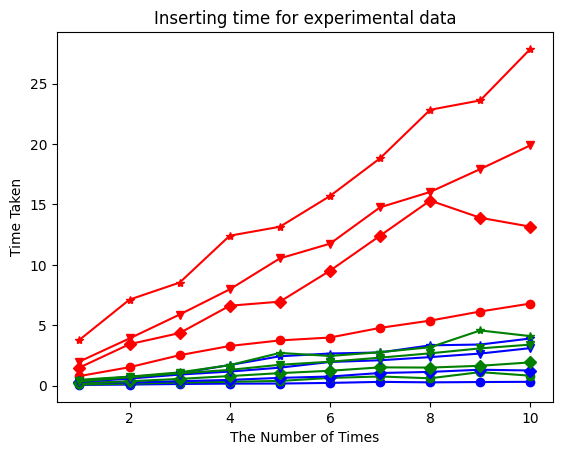

In [131]:
# experimental  data 
# inserting function

import numpy as np
import pylab as pb

def plotOfInserting(datadict, colourdict, size):

    PlotI = pb.subplot(111)
    PlotI.set_yscale('log')
    PlotI.set_xlabel('The Number of Times')
    PlotI.set_ylabel('Time Taken')
    PlotI.set_title('Inserting time for real data')

    for classname, colour in colour_dict.items():
        
        aryx = np.arange(1,size+1)
        aryy = np.zeros(size)
        
        for key in datadict.keys():
            tempdata = datadict[key]
            for i in range(1,size+1):
                print(i)
                InstantiateTime = 0
                InsertStart = timeit.default_timer()
                for j in range(i):
                    InstantiateStart = timeit.default_timer()
                    algorithm = classname()
                    if str(classname) == str(BloomFilterSet):
                        algorithm.initVariables(len(tempdata), 0.01, hashFunctions)
                    InstantiateEnd = timeit.default_timer()
                    InstantiateTime += InstantiateEnd - InstantiateStart
                    seen = {}
                    for word in tempdata:
                        if word is not None and word not in seen:
                            seen[word] = True
                            inserted = algorithm.insertElement(word)
                InsertEnd = timeit.default_timer()
                InsertTime = (InsertEnd - InsertStart) - InstantiateTime
                aryy[i-1] += InsertTime
        
        aryy /= len(datadict)
        PlotI.plot(aryx,aryy,c=colourdict[classname])

    pb.show()

colour_dict = {
    SequentialSearchSet: 'purple',
    BinarySearchTreeSet: 'pink',
    BalancedSearchTreeSet: 'green',
    BloomFilterSet: 'blue'
    }

plotOfInserting(files, colour_dict, 25)

### For Real Data - Searching

In [ ]:
def plotOfSearching(datadict, colourdict, size):
    
    PlotS = pb.subplot(111)
    PlotS.set_yscale('log')
    PlotS.set_xlabel('The Number of Times')
    PlotS.set_ylabel('Time Taken')
    PlotS.set_title('Search time for real data')

    for classname, colour in colour_dict.items():
        aryx = np.arange(1,size+1)
        aryy = np.zeros(size)

        algorithm = classname()
        if str(classname) == str(BloomFilterSet):
            algorithm.initVariables(len(tempdata), 0.01, hashFunctions)

        for key in datadict.keys():
            tempdata = datadict[key]
            seen = {}
            for word in tempdata:
                if word is not None and word not in seen:
                    seen[word] = True
                    inserted = algorithm.insertElement(word)

            for i in range(1,size+1):
                SearchStart = timeit.default_timer()
                for j in range(i):
                    for word in wordsforsearch:
                        searched = algorithm.searchElement(word)
                SearchEnd = timeit.default_timer()
                SearchTime = (SearchEnd - SearchStart)
                aryy[i-1] += SearchTime
        
        aryy /= len(datadict)
        PlotS.plot(aryx,aryy,c=colourdict[classname])

    pb.show()

plotOfSearching(files, colour_dict, 100)

In [144]:
def RealInsertTs(classname, datas):
    algorithm = classname()
    if str(classname) == str(BloomFilterSet):
        algorithm.initVariables(len(datas), 0.01, hashFunctions)

    seen = {}
    InsertStart = timeit.default_timer()
    for word in datas:
        if word is not None and word not in seen:
            seen[word] = True
            inserted = algorithm.insertElement(word)
    InsertEnd = timeit.default_timer()
    InsertTime = InsertEnd - InsertStart
    return algorithm, InsertTime


rInsertTS1, rInsertTS2, rInsertTS3, rInsertTS4, rInsertTS5 = 0, 0, 0, 0, 0
Seqs, Bsts, Basts, Ttsts, Bfs = [], [], [], [], []
IterationTimes = 10
RealInsertTimes = []
for key in files.keys():
    Algs1s, Algs2s, Algs3s, Algs4s, Algs5s = [], [], [], [], []
    for _ in range(IterationTimes):
        Algs1, realInsertT1 = RealInsertTs(SequentialSearchSet, files[key])
        rInsertTS1 += realInsertT1
        Algs1s.append(Algs1)
        Algs2, realInsertT2 = RealInsertTs(BinarySearchTreeSet, files[key])
        rInsertTS2 += realInsertT2
        Algs2s.append(Algs2)
        Algs3, realInsertT3 = RealInsertTs(BalancedSearchTreeSet, files[key])
        rInsertTS3 += realInsertT3
        Algs3s.append(Algs3)
        Algs4, realInsertT4 = RealInsertTs(TwoThreeBSTSet, files[key])
        rInsertTS4 += realInsertT4
        Algs4s.append(Algs4)
        Algs5, realInsertT5 = RealInsertTs(BloomFilterSet, files[key])
        rInsertTS5 += realInsertT5
        Algs5s.append(Algs5)
        RTInsertTimes = [rInsertTS1 / IterationTimes, rInsertTS2 / IterationTimes, 
                        rInsertTS3 / IterationTimes, rInsertTS4 / IterationTimes, 
                        rInsertTS5 / IterationTimes]
    RealInsertTimes.append(RTInsertTimes)
    Seqs.append(Algs1s)
    Bsts.append(Algs2s)
    Basts.append(Algs3s)
    Ttsts.append(Algs4s)
    Bfs.append(Algs5s)

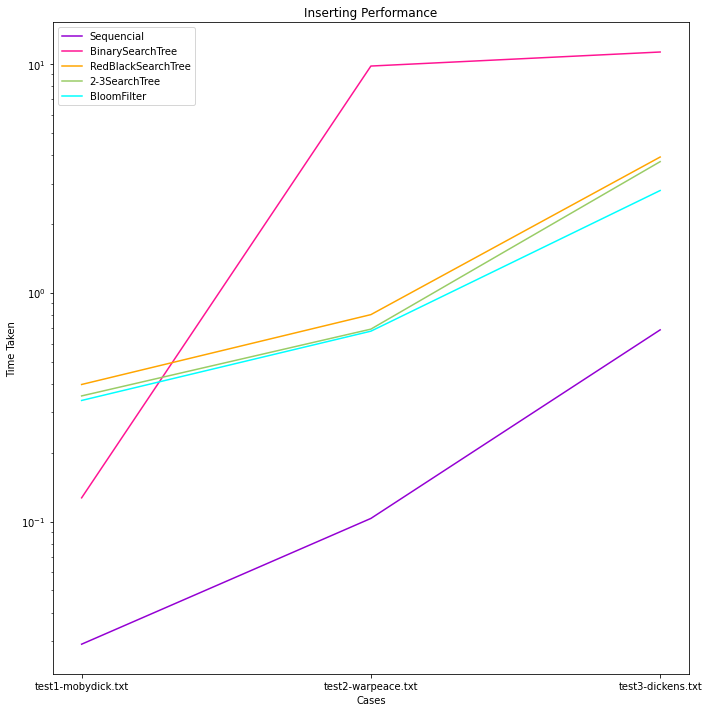

In [151]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
labels = ["Sequencial", "BinarySearchTree", "RedBlackSearchTree", "2-3SearchTree", "BloomFilter"]
colors = ["#9400D3", "#FF1493", "#FFA500", "#99CC66", "#00FFFF"]
rys = [list(x) for x in zip(*RealInsertTimes)]
filenames = ["test1-mobydick.txt", "test2-warpeace.txt", "test3-dickens.txt"]

for i in range(5):
    axs.plot(filenames, rys[i], label=labels[i], c=colors[i])
axs.set_xlabel("Cases")
axs.set_ylabel("Time Taken")
axs.set_title("Inserting Performance")
axs.set_yscale("log")
axs.legend()

plt.tight_layout()
plt.savefig('RealInsertTimes.png')
plt.show()

In [154]:
def RealSearchTs(obj, searchdata):
    SearchStart = timeit.default_timer()
    for ws in searchdata:
        if ws is not None:
            searched = obj.searchElement(ws)
        else:
            searched = None
    SearchEnd = timeit.default_timer()
    SearchTime = SearchEnd - SearchStart
    return SearchTime

rSearchTS1, rSearchTS2, rSearchTS3, rSearchTS4, rSearchTS5 = 0, 0, 0, 0, 0
RealSearchTimes = []
for i in range(3):
    RTSearchTimes = []
    for j in range(IterationTimes):
        searchT1 = RealSearchTs(Seqs[i][j], wordsforsearch)
        rSearchTS1 += searchT1
        searchT2 = RealSearchTs(Bsts[i][j], wordsforsearch)
        rSearchTS2 += searchT2
        searchT3 = RealSearchTs(Basts[i][j], wordsforsearch)
        rSearchTS3 += searchT3
        searchT4 = RealSearchTs(Ttsts[i][j], wordsforsearch)
        rSearchTS4 += searchT4
        searchT5 = RealSearchTs(Bfs[i][j], wordsforsearch)
        rSearchTS5 += searchT5
        RTSearchTimes = [rSearchTS1 / IterationTimes, rSearchTS2 / IterationTimes, 
                        rSearchTS3 / IterationTimes, rSearchTS4 / IterationTimes, 
                        rSearchTS5 / IterationTimes]
    RealSearchTimes.append(RTSearchTimes)

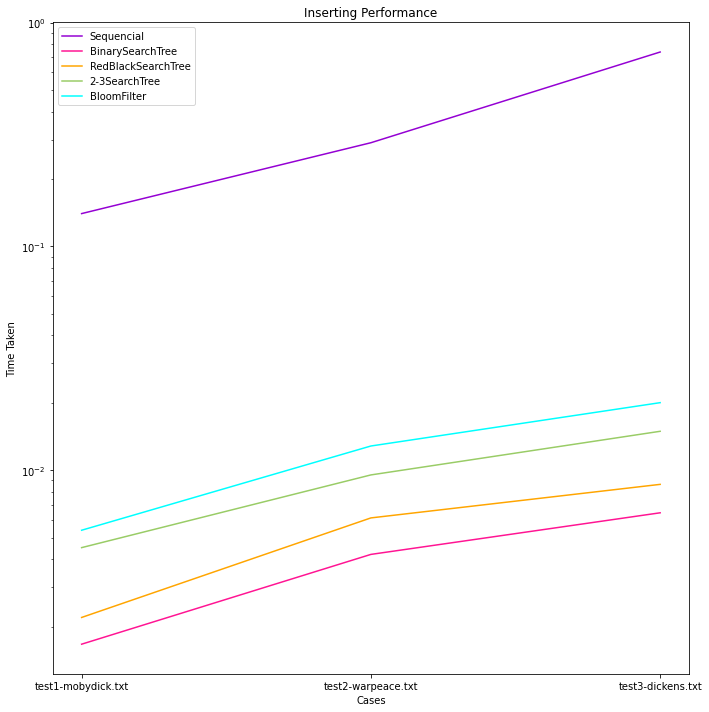

In [156]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
rys = [list(x) for x in zip(*RealSearchTimes)]
filenames = ["test1-mobydick.txt", "test2-warpeace.txt", "test3-dickens.txt"]

for i in range(5):
    axs.plot(filenames, rys[i], label=labels[i], c=colors[i])
axs.set_xlabel("Cases")
axs.set_ylabel("Time Taken")
axs.set_title("Inserting Performance")
axs.set_yscale("log")
axs.legend()

plt.tight_layout()
plt.savefig('RealSearchTimes.png')
plt.show()

### For Synthetic Data

In [13]:
dataGenerator = TestDataGenerator()
dataGenerator.setParams(100, 0.6)
SyntheticDatasT = dataGenerator.generateData(100000)

In [14]:
def InsertTimeTest(classname, datalist):
    # Remove Duplicates
    seen = {}
    uniqueDatas = []
    for e in datalist:
        if e not in seen:
            seen[e] = True
            uniqueDatas.append(e)
    
    algorithm = classname()
    if str(classname) == str(BloomFilterSet):
        algorithm.initVariables(len(datalist), 0.01, hashFunctions)

    InsertStart = timeit.default_timer()

    for word in uniqueDatas:
        # Remove Missing Values
        if word is not None:
            inserted = algorithm.insertElement(word)
    InsertEnd = timeit.default_timer()
    InsertTime = InsertEnd - InsertStart
    return algorithm, InsertTime

In [15]:
def SynInsertT(ObjFunction, ObjSyn, timeList, IterateNum, data):
    tempInsertTimes = []
    tempObjs = []
    tempTimes = 0
    for _ in range(IterateNum):
        Obj, t = InsertTimeTest(ObjFunction, data)
        tempObjs.append(Obj)
        tempTimes += t
    ObjSyn.append(tempObjs)
    timeList.append(tempTimes / IterateNum)
    return ObjSyn, timeList

In [16]:
SEQs, BSTs, RBTs, TTSTs, BFs = [], [], [], [], []
InsertTimes = []
IterateN = 3

for data in SyntheticDatasT:
    tempTs = []
    SEQs, tempTs = SynInsertT(SequentialSearchSet, SEQs, tempTs, IterateN, data)
    BSTs, tempTs = SynInsertT(BinarySearchTreeSet, BSTs, tempTs, IterateN, data)
    RBTs, tempTs = SynInsertT(BalancedSearchTreeSet, RBTs, tempTs, IterateN, data)
    TTSTs, tempTs = SynInsertT(TwoThreeBSTSet, TTSTs, tempTs, IterateN, data)
    BFs, tempTs = SynInsertT(BloomFilterSet, BFs, tempTs, IterateN, data)
    print(tempTs)
    InsertTimes.append(tempTs)

[0.01653413333330415, 0.3503667999999986, 0.9146498333333662, 1.3514880666666613, 0.6504677999999634]
[0.010884633333337964, 0.40938323333337695, 0.9898798333333616, 1.3238029666666382, 9.414239166666675]
[0.0099696000000525, 0.5330599999999777, 0.7916841999999633, 1.7254049666667015, 0.4768296333334092]
[0.009051633333304684, 303.0830819333334, 0.4940992666668838, 0.8581034999998943, 0.43856446666677584]
[0.010159933333246348, 236.06419433333335, 1.1616462000001775, 0.5157758666665965, 0.43938843333323047]
[0.003639100000024579, 0.06953290000001289, 0.2541958333332938, 0.8740355666667105, 0.22816193333331589]
[0.0035365999998854627, 0.06884863333334579, 0.2620873666666436, 0.2522866999999375, 0.2363053666667838]
[0.007020300000021962, 0.90286019999985, 0.5310030000000552, 0.516516799999863, 0.5680857666667786]
[0.006884100000055089, 0.1448515333334702, 1.4734364000000824, 0.5212564000000081, 0.9533335666666668]
[0.005277033333337992, 0.11340746666670991, 0.4046277333333516, 1.57560740

In [ ]:
import matplotlib.pyplot as plt
names = ["Normal", "LongStr", "SpecialStr", "Ascend", "Descend", "Nones", 
         "Duplicates","StrInts","StrFloats","Spaces","Palindrome","Repeats"]
labels = ["Sequencial", "BinarySearchTree", "RedBlackSearchTree", "2-3SearchTree", "BloomFilter"]
colors = ["#9400D3", "#FF1493", "#FFA500", "#99CC66", "#00FFFF"]

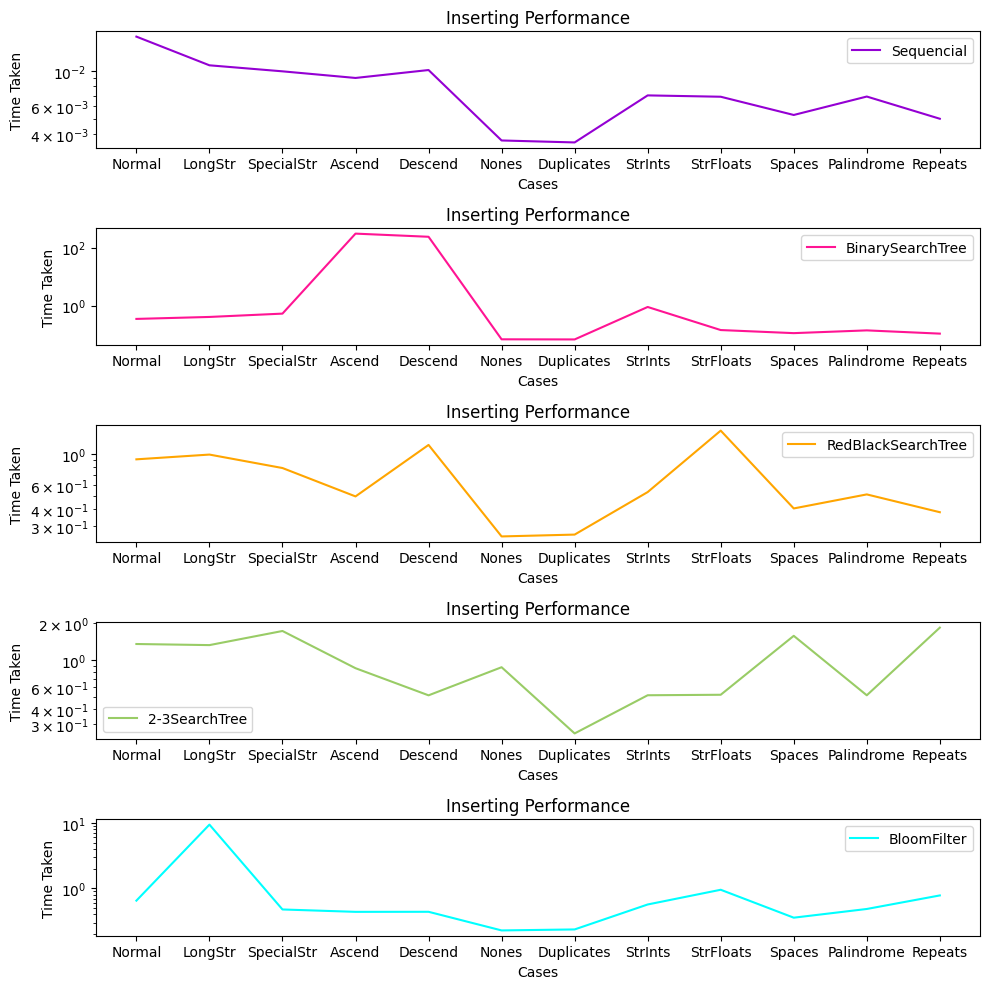

In [20]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
ys = [list(x) for x in zip(*InsertTimes)]

for i in range(5):
    axs[i].plot(names, ys[i], label=labels[i], c=colors[i])
    axs[i].set_xlabel("Cases")
    axs[i].set_ylabel("Time Taken")
    axs[i].set_title("Inserting Performance")
    axs[i].set_yscale("log")
    axs[i].legend()

plt.tight_layout()
plt.savefig('SynInsertTimes.png')
plt.show()

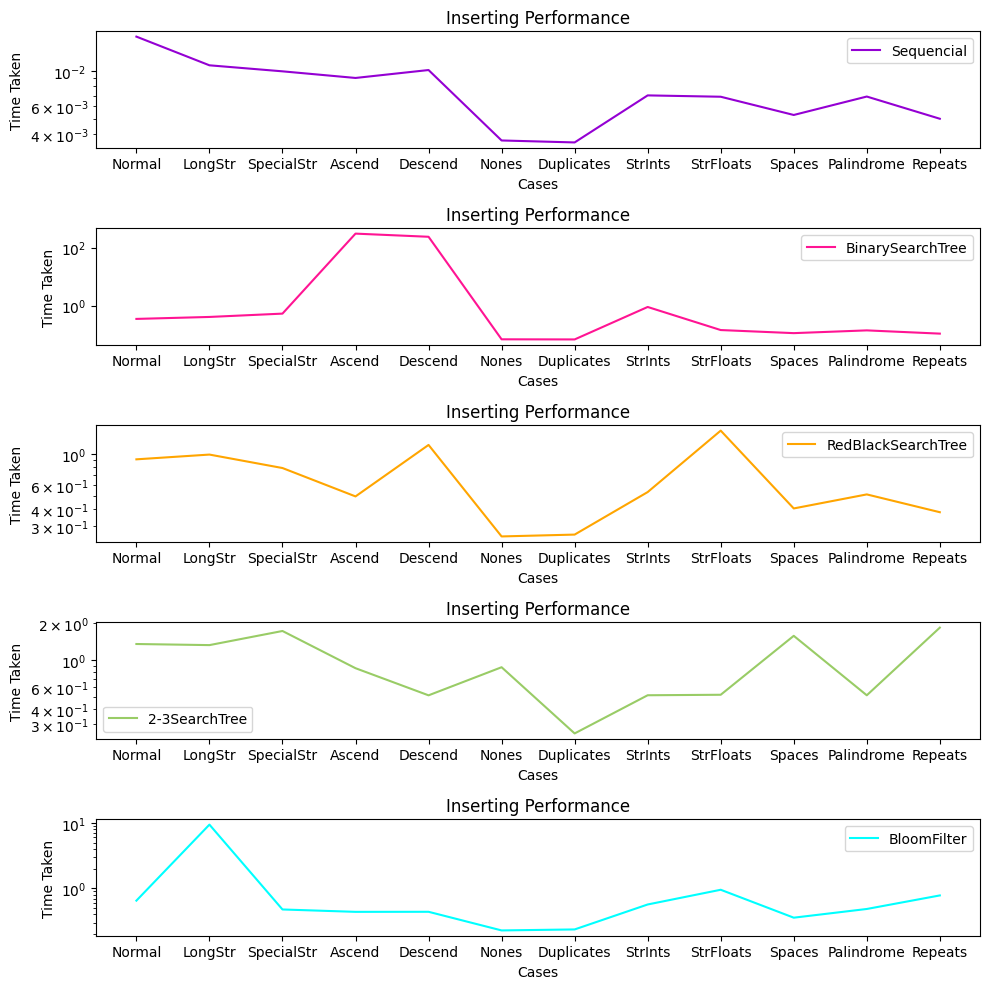

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
ys = [list(x) for x in zip(*InsertTimes)]

for i in range(5):
    axs.plot(names, ys[i], label=labels[i], c=colors[i])
axs.set_xlabel("Cases")
axs.set_ylabel("Time Taken")
axs.set_title("Inserting Performance")
axs.set_yscale("log")
axs.legend()

plt.tight_layout()
plt.savefig('SynInsertTimes2.png')
plt.show()

In [21]:
synSearchDatas = []
for datalist in SyntheticDatasT:
    num = round(len(datalist) * 0.3)
    templist = []
    seen = {}
    # Choose from list
    while len(templist) < num:
        tempdata = random.choice(datalist)
        if tempdata not in seen:
            seen[tempdata] = True
            templist.append(tempdata)
    # Generate new values
    falsenum = round(len(datalist) * 0.2)
    for _ in range(falsenum):
        fdata = ''.join(random.choice(string.ascii_lowercase) for _ in range(random.randint(8, 12))) 
        templist.append(fdata)
    synSearchDatas.append(templist)

In [26]:
def SearchTimeTest(obj, searchdata):
    SearchStart = timeit.default_timer()
    for ws in searchdata:
        if ws is not None:
            searched = obj.searchElement(ws)
    SearchEnd = timeit.default_timer()
    SearchTime = SearchEnd - SearchStart
    return SearchTime

In [27]:
def SynSearchT(Objs, data, IterateN, tempSearchT):
    searchTSum = 0
    for i in range(IterateN):
        searchTSum += SearchTimeTest(Objs[i], data)
    tempSearchT.append(searchTSum / IterateN)
    return tempSearchT

In [28]:
SearchTimes = []
for i in range(len(synSearchDatas)):
    tempSearchT = []
    tempSearchT = SynSearchT(SEQs[i], synSearchDatas[i], IterateN, tempSearchT)
    tempSearchT = SynSearchT(BSTs[i], synSearchDatas[i], IterateN, tempSearchT)
    tempSearchT = SynSearchT(RBTs[i], synSearchDatas[i], IterateN, tempSearchT)
    tempSearchT = SynSearchT(TTSTs[i], synSearchDatas[i], IterateN, tempSearchT)
    tempSearchT = SynSearchT(BFs[i], synSearchDatas[i], IterateN, tempSearchT)
    print(tempSearchT)
    SearchTimes.append(tempSearchT)

[46.0965495666666, 0.0743900999999217, 0.07394653333327976, 0.17707323333312766, 0.18218570000014248]
[47.69171676666671, 0.09230196666643072, 0.09057816666669775, 0.1982951666665637, 2.0080529999995633]
[45.80453216666683, 0.07650576666674169, 0.07717386666657451, 0.17105999999997343, 0.17470886666706065]
[63.948803766666664, 187.51656236666713, 0.06874713333339362, 0.20083120000011453, 0.17276363333379172]
[64.34365206666644, 103.64942509999976, 0.06822273333303504, 0.17887946666663387, 0.17406896666670946]
[24.178252500000173, 0.06287426666676765, 0.06421410000014778, 0.14771206666652384, 0.15342536666654874]
[22.46225516666679, 0.061385799999698065, 0.06366689999989224, 0.14655633333344062, 0.15515603333339337]
[50.722207799999524, 0.05846076666693989, 0.0630926666663072, 0.1427776999995937, 0.22276366666695444]
[49.50864976666647, 0.05376656666673322, 0.06521439999960421, 0.14502486666606274, 0.3446192000001247]
[43.271278200000175, 0.07003413333313802, 0.06973276666667516, 0.1569

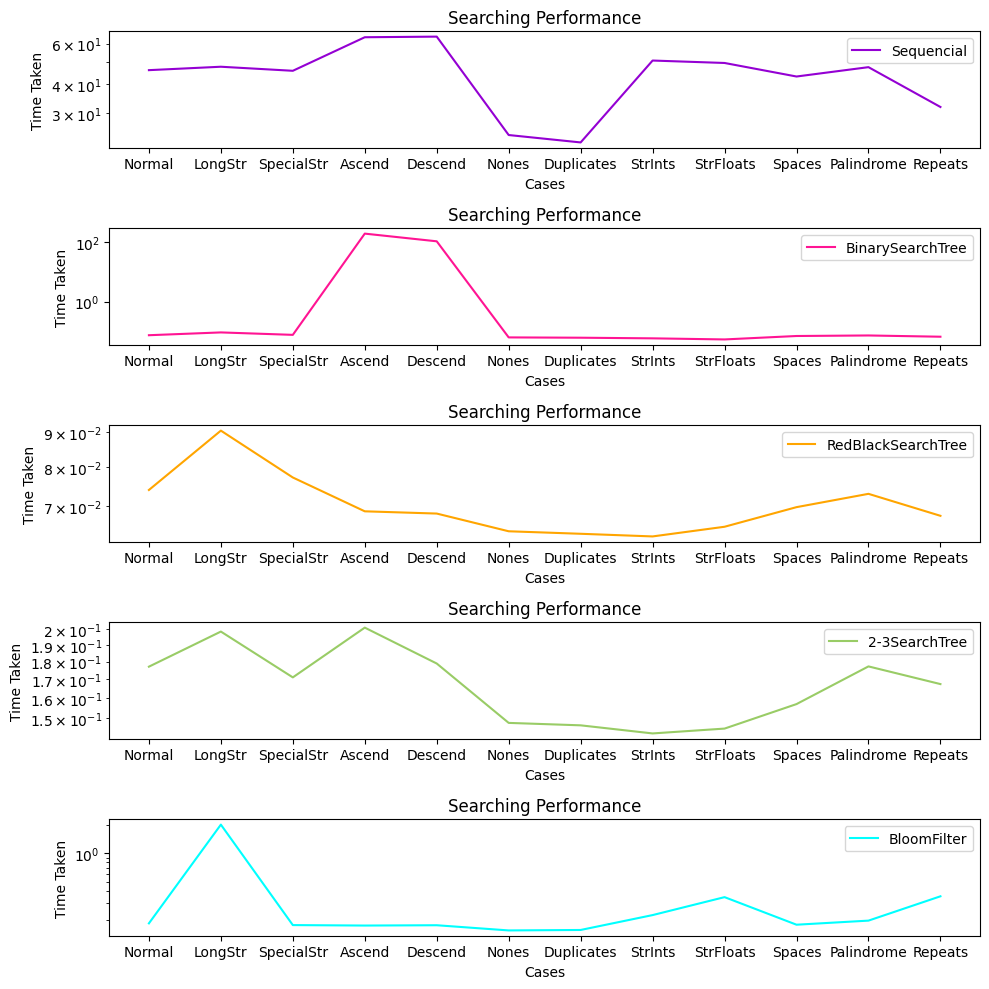

In [30]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
ys = [list(x) for x in zip(*SearchTimes)]

for i in range(5):
    axs[i].plot(names, ys[i], label=labels[i], c=colors[i])
    axs[i].set_xlabel("Cases")
    axs[i].set_ylabel("Time Taken")
    axs[i].set_title("Searching Performance")
    axs[i].set_yscale("log")
    axs[i].legend()

plt.tight_layout()
plt.savefig('SynSearchTimes.png')
plt.show()

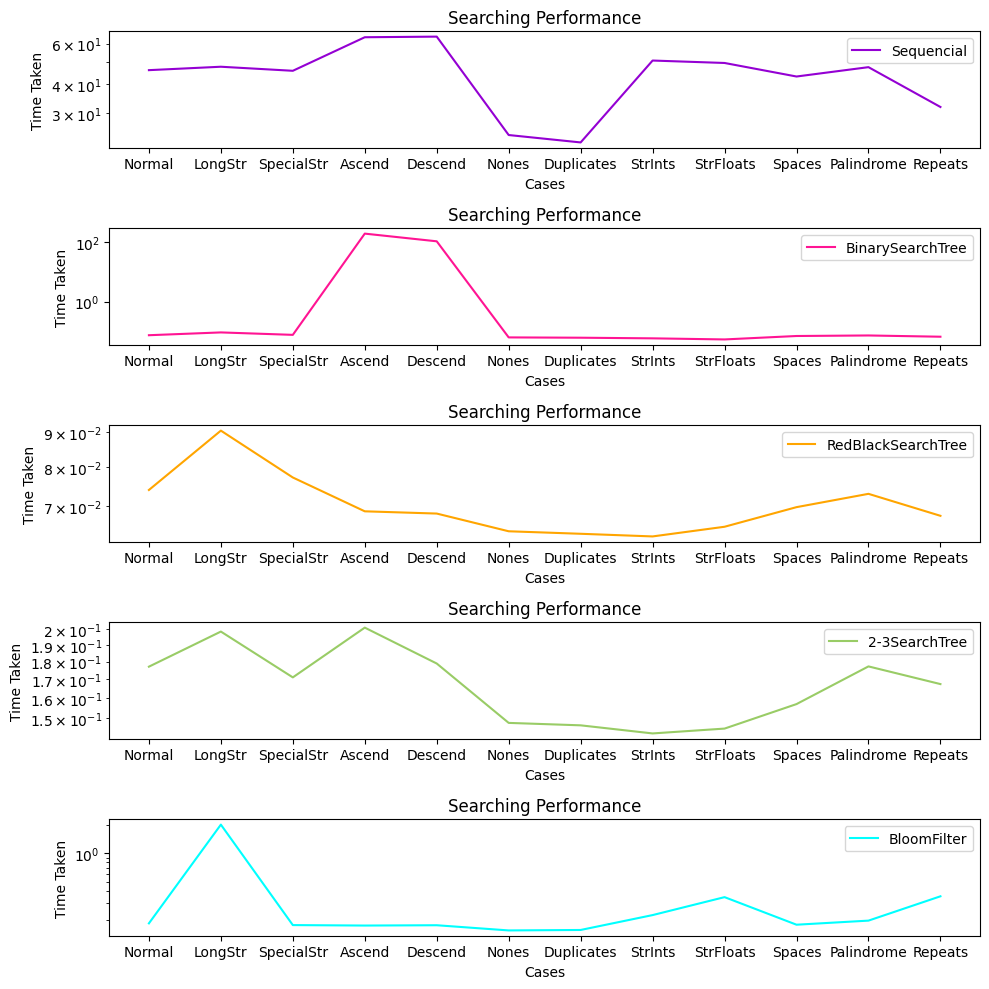

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
ys = [list(x) for x in zip(*SearchTimes)]

for i in range(5):
    axs.plot(names, ys[i], label=labels[i], c=colors[i])
axs.set_xlabel("Cases")
axs.set_ylabel("Time Taken")
axs.set_title("Searching Performance")
axs.set_yscale("log")
axs.legend()

plt.tight_layout()
plt.savefig('SynSearchTimes2.png')
plt.show()